In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Ellipse
from skymapper import Map, projection

from msfm.utils import files

24-05-17 18:26:08   imports.py INF   Setting up healpy to run on 10 CPUs 


In [2]:
# Enable LaTeX rendering
plt.rcParams['text.usetex'] = True
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

# 246pt in inches (for the Phys Rev template)
half_linewidth = 3.41
# 510pt in inches (figure* environment in the Phys Rev template)
full_linewidth = 7.06

In [3]:
conf = "/Users/arne/git/multiprobe-simulation-forward-model/configs/v8/linear_bias_no_smoothing.yaml"
conf = files.load_config(conf)

n_side = conf["analysis"]["n_side"]
n_pix = hp.nside2npix(n_side)

data_vec_pix, patches_pix_dict, _, _ = files.load_pixel_file(conf)

24-05-17 18:26:08     files.py INF   Loaded the pixel file /Users/arne/git/multiprobe-simulation-forward-model/data/DESY3_pixels_v11_512.h5 


In [4]:
# color map
colors = sns.color_palette("colorblind", len(patches_pix_dict["maglim"]))
norm_values = np.linspace(0, 1, len(colors)+1)
color_list = [(norm_values[i], colors[i]) for i in range(len(colors))]
# add black for the padding
color_list.append((1, (0, 0, 0)))
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', color_list)

# nested ordering
patches_map = np.full(n_pix, hp.UNSEEN)

# patches
for i, patch in enumerate(patches_pix_dict["maglim"]):
    patches_map[hp.ring2nest(n_side, patch)] = norm_values[i]
    # patches_map[patch] = i + 1

# padding
patches_map[data_vec_pix] = norm_values[-1]
patches_map[hp.ring2nest(n_side, patches_pix_dict["maglim"][0])] = norm_values[0]


patches_map_masked = np.ma.masked_where(patches_map == hp.UNSEEN, patches_map)

# healpy

In [5]:
def add_black_rim(ax, color="black", linewidth=0.5):
    """Add a black rim around the Mollweide projection plot."""
    # the parameters for the ellipse were found by trial and error
    ellipse = Ellipse(xy=(0, 0), width=4, height=2, edgecolor=color, facecolor="none", linewidth=linewidth)
    ax.add_patch(ellipse)

<Figure size 341x170.5 with 0 Axes>

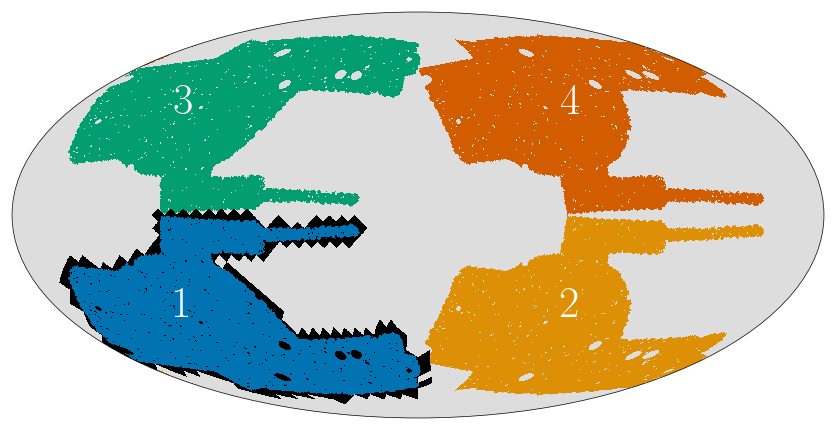

In [6]:
plt.figure(figsize=(half_linewidth, 0.5*half_linewidth))

hp.mollview(patches_map, title="", cmap=custom_cmap, cbar=False, xsize=3000, badcolor="#dddddd", nest=True)
# hp.mollview(patches_map, title="", cbar=False, xsize=5000, badcolor="#dddddd")

ax = plt.gca()
add_black_rim(ax)

ax.text(-1.2, -0.5, "1", fontsize=32, color="white", fontweight='bold')
ax.text(-1.2, 0.5, "3", fontsize=32, color="white", fontweight='bold')
ax.text(0.7, -0.5, "2", fontsize=32, color="white", fontweight='bold')
ax.text(0.7, 0.5, "4", fontsize=32, color="white", fontweight='bold')

plt.savefig("plots/placeholder_patches.png", bbox_inches="tight", dpi=300)

# skymapper

In [7]:
# moll = Map(projection.Mollweide())
# moll.healpix(
#     patches_map_masked,
#     cmap="viridis",
#     nest=True,
#     color_percentiles=[0, 100],
#     vmin=patches_map_masked.min(),
#     vmax=patches_map_masked.max(),
# )
# # moll.healpix(patches_map_masked, cmap="viridis", nest=False, color_percentiles=None)
# # moll.healpix(patches_map_masked, cmap=custom_cmap, nest=False, color_percentiles=[0,100])
# # moll.healpix(patches_map, cmap=custom_cmap, nest=False)

# # moll.fig.set_size_inches((half_linewidth, 0.5*half_linewidth))
# moll.fig.set_size_inches((20, 10))
# # moll.fig.savefig("plots/placeholder_patches_1.png", bbox_inches="tight", dpi=600)